# Body fat linear combinations

## Motivation

Measuring bodyfat precisely is hard, and proxies are very useful. Can we
predict the outcome of an expensive, inconvenient procedure using only
easy-to-gather measurements?

<figure>
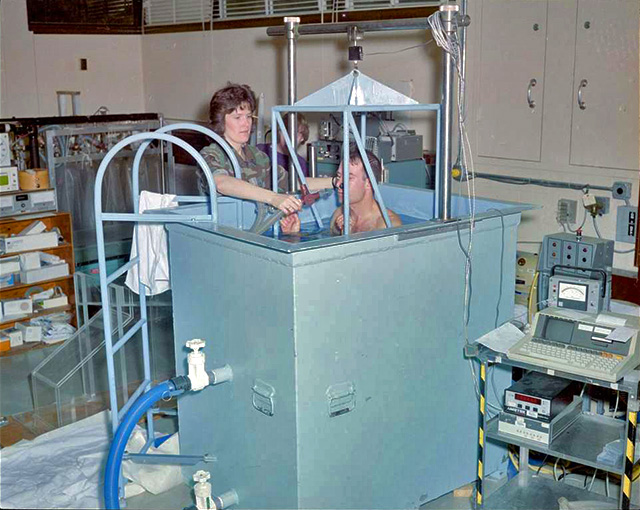
<figcaption aria-hidden="true">Hydrostatic weighing</figcaption>
</figure>

Image from https://www.topendsports.com/testing/tests/underwater.htm

In [3]:
all_vars <- c("Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", 
              "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist")
stopifnot(all(all_vars %in% names(bodyfat_df)))

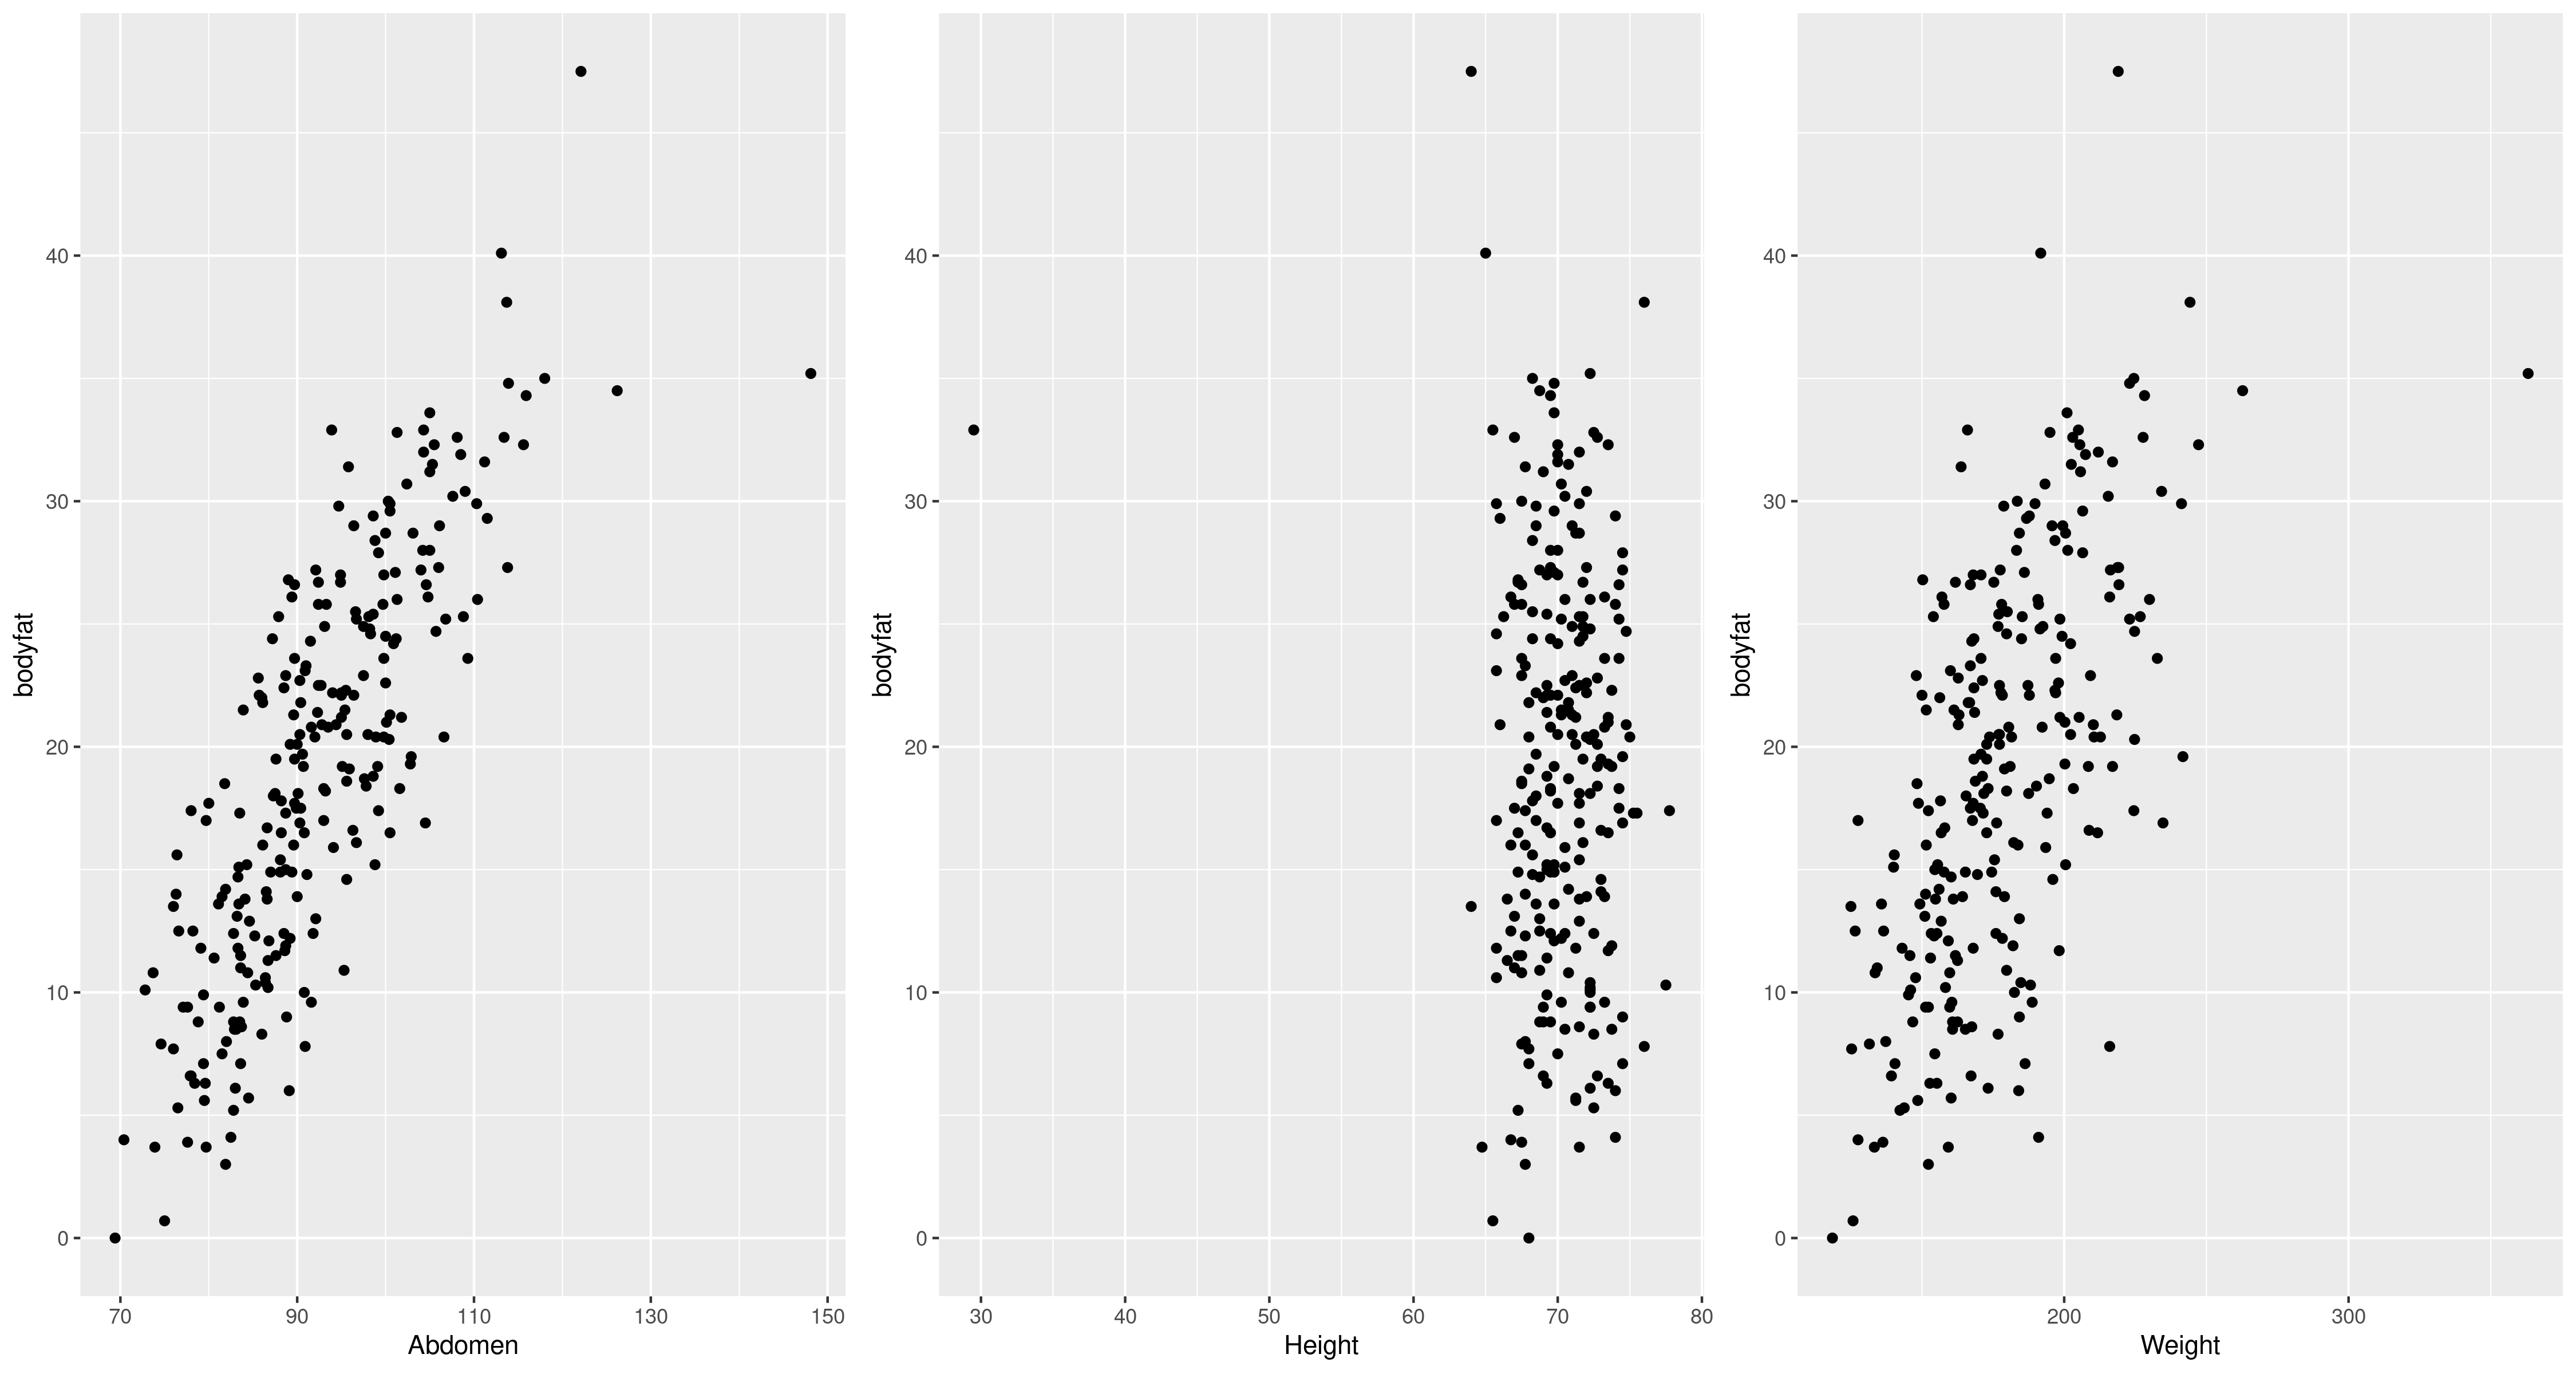

In [8]:
grid.arrange(
    ggplot(bodyfat_df) + geom_point(aes(x=Abdomen, y=bodyfat)),
    ggplot(bodyfat_df) + geom_point(aes(x=Height, y=bodyfat)),
    ggplot(bodyfat_df) + geom_point(aes(x=Weight, y=bodyfat)),
    ncol=3)

In [21]:
PlotFit <- function(reg) {
    ggplot() +
        geom_point(aes(x=reg$model$bodyfat, y=reg$fitted.values)) +
        geom_abline(aes(slope=1, intercept=0)) +
        xlab("Actual bodyfat") + ylab("Predicted bodyfat")
}



[1] "Error: 19.456161"

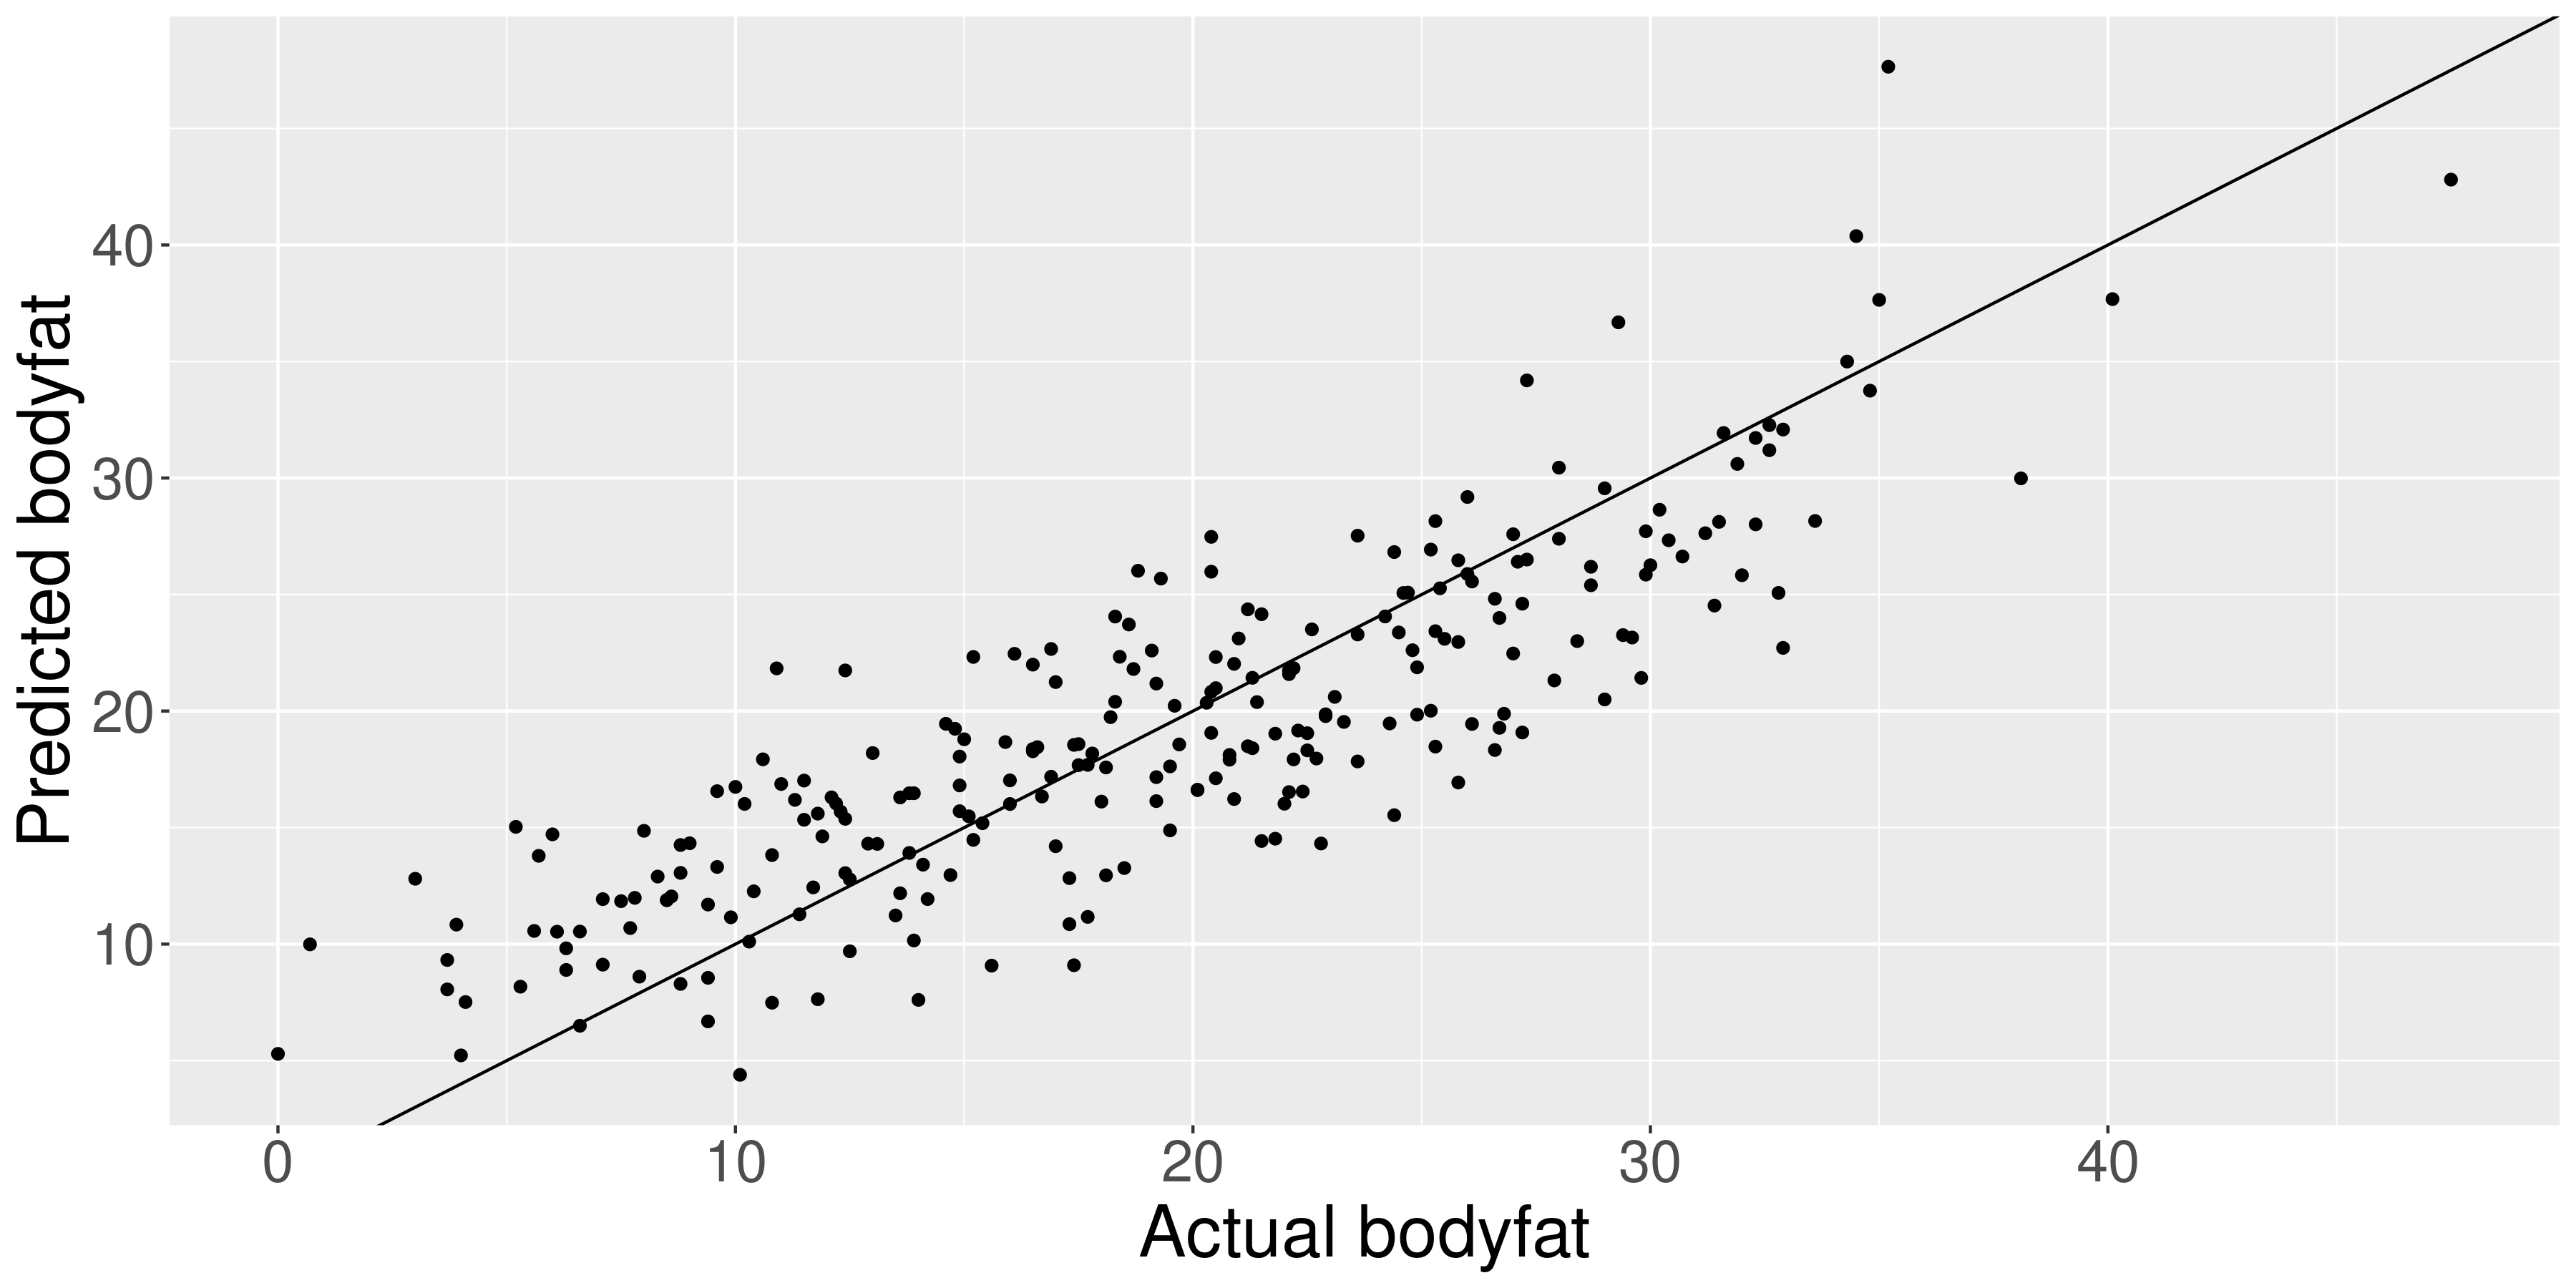

In [28]:
reg <- lm(bodyfat ~ Abdomen + Height + Weight, bodyfat_df)
print(sprintf("Error: %f", mean(reg$residuals^2)))
#PlotFit(reg)

In [55]:
print(reg$coefficients)

(Intercept)     Abdomen      Height      Weight 
-36.6147193   0.9515631  -0.1270307  -0.1307606 

In [49]:
bodyfat_df <- bodyfat_df %>%
    mutate(height_norm=(Height - mean(Height)) / sd(Height),
           weight_norm=(Weight - mean(Weight)) / sd(Weight),
           hw_diff=height_norm - weight_norm)

reg <- lm(bodyfat ~ Abdomen + Height + Weight, bodyfat_df)
reg_norm <- lm(bodyfat ~ Abdomen + height_norm + weight_norm, bodyfat_df)
reg_diff <- lm(bodyfat ~ Abdomen + height_norm + weight_norm + hw_diff, bodyfat_df)

cat(sprintf("Original error:\t\t\t\t%f\n", mean(reg$residuals^2)))
cat(sprintf("Normalized regression error:\t\t%f\n", mean(reg_norm$residuals^2)))
cat(sprintf("Normalized regression difference error:\t%f\n", mean(reg_norm$residuals^2)))


Original error:             19.456161
Normalized regression error:        19.456161
Normalized regression difference error: 19.456161

In [51]:
summary(reg_norm)


Call:
lm(formula = bodyfat ~ Abdomen + height_norm + weight_norm, data = bodyfat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4481  -3.1699  -0.0009   3.0830  10.1897 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -68.92203    5.79408 -11.895  < 2e-16 ***
Abdomen       0.95156    0.06253  15.218  < 2e-16 ***
height_norm  -0.46530    0.32593  -1.428    0.155    
weight_norm  -3.84294    0.70602  -5.443 1.26e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.446 on 248 degrees of freedom
Multiple R-squared:  0.7211,    Adjusted R-squared:  0.7177 
F-statistic: 213.7 on 3 and 248 DF,  p-value: < 2.2e-16

In [50]:
summary(reg_diff)


Call:
lm(formula = bodyfat ~ Abdomen + height_norm + weight_norm + 
    hw_diff, data = bodyfat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4481  -3.1699  -0.0009   3.0830  10.1897 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -68.92203    5.79408 -11.895  < 2e-16 ***
Abdomen       0.95156    0.06253  15.218  < 2e-16 ***
height_norm  -0.46530    0.32593  -1.428    0.155    
weight_norm  -3.84294    0.70602  -5.443 1.26e-07 ***
hw_diff            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.446 on 248 degrees of freedom
Multiple R-squared:  0.7211,    Adjusted R-squared:  0.7177 
F-statistic: 213.7 on 3 and 248 DF,  p-value: < 2.2e-16